In [241]:
import pandas as pd   # data preprocessing
import numpy as np    # mathematical computation
import matplotlib.pyplot as plt  # vizualization
import seaborn as sns  # vizualization
import sklearn
import warnings
warnings.filterwarnings("ignore")
import os

In [242]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [244]:
train.shape

(891, 12)

# DATA ANALYSIS AND VISUALIZATION

For further exploring the data, let us visually represent the data in order to get a better idea. Seaborn, Matplotlib data visualization libraries in Python are used in this Machine Learning Project.

In [245]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [246]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [247]:
train['Age'].nunique()

88

In [248]:
train.duplicated().sum()

0

In [249]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Analysing data

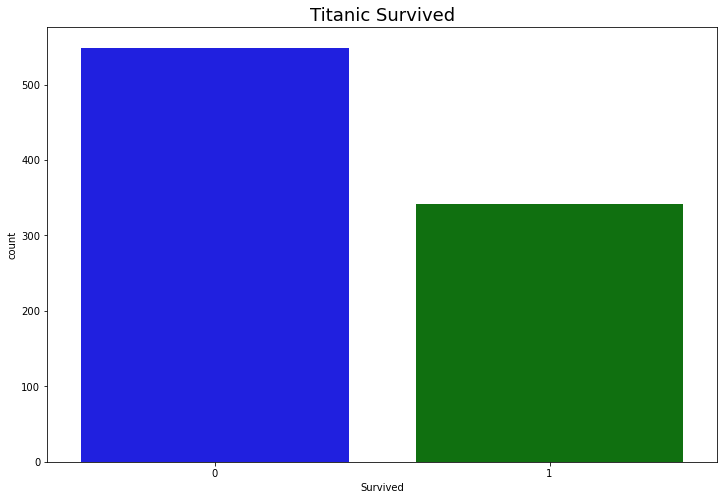

In [251]:
# Plot of Titanic Models Distribution
figure = plt.figure(figsize=(12, 8))
plt.title('Titanic Survived', fontsize=18)
custom_palette = ["blue", "green",]
plot = sns.countplot(x="Survived", data=train, order=train['Survived'].value_counts().index[:5], palette=custom_palette)
plt.show()

In [ ]:
#those who did not survived (more than 500) are greater than those who survived(nearly 300)

<AxesSubplot:xlabel='Survived', ylabel='count'>

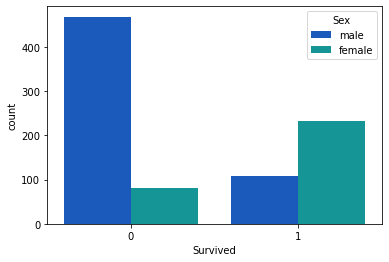

In [255]:
sns.countplot(x= 'Survived', hue='Sex', data=train, palette='winter')

In [ ]:
#Analysis: 0 represents not survived and 1 is for survives 
# women are thrice more likely to survive than males.

<AxesSubplot:xlabel='Survived', ylabel='count'>

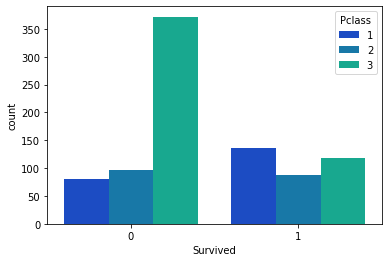

In [256]:
sns.countplot(x= 'Survived', hue='Pclass', data=train, palette='winter')

In [ ]:
#Analysis: the passangers who did not survived belong to the 3rd class.
## 1st class passangers are more likely to survive

<AxesSubplot:ylabel='Frequency'>

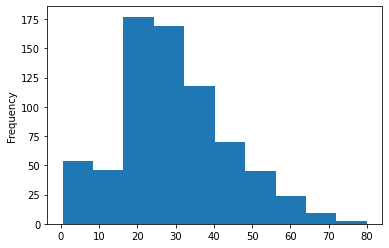

In [257]:
train['Age'].plot.hist()

In [ ]:
# we notice that highest age group tavelling are among the young age between 20-40. 
#very few passangers in age group 70-80

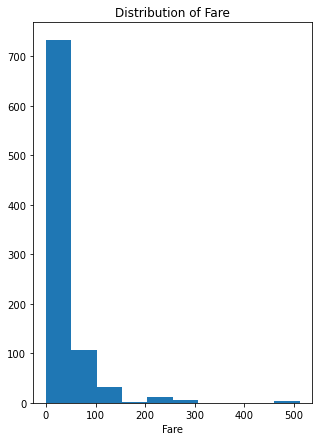

In [258]:
 plt.figure(figsize=(5,7))
plt.hist(train['Fare'])
plt.title("Distribution of Fare")
plt.xlabel('Fare')
plt.show()

In [ ]:
#we observe that most of the tickets bought are under fare 100 
# and very few are on the higher side of fare i.e. 220-500 range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

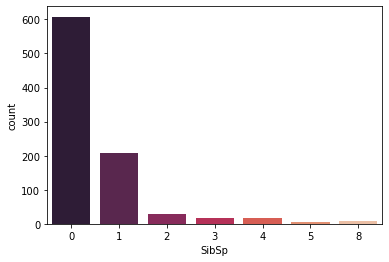

In [259]:
sns.countplot(x='SibSp', data=train, palette='rocket')

In [ ]:
# we notice that most of the passangers do not have their siblings aboard.

<AxesSubplot:ylabel='Frequency'>

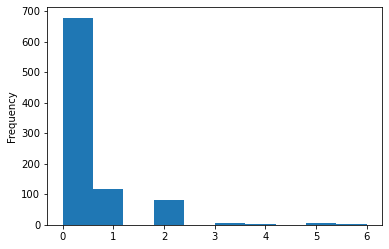

In [260]:
train['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

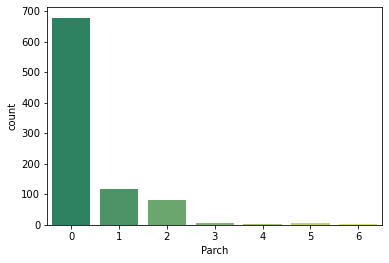

In [261]:
sns.countplot(x='Parch', data=train, palette='summer')

In [ ]:
# the number of parents and siblings who aboard the ship are less

# DATA WRANGLING

In [ ]:
## Data wrangling means cleaning the data, removing the null values,
#dropping unwanted columns, adding new ones if needed.

In [262]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# age and cabin has most null values. and embarked too has null values

#we can plot it on heat map

<AxesSubplot:>

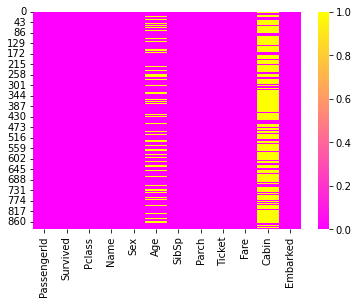

In [263]:
sns.heatmap(train.isnull(),cmap='spring')

In [ ]:
#here yellow color is showing the null values, highest in cabin followed by age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

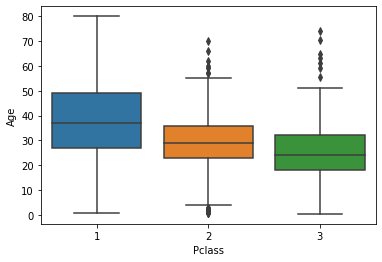

In [264]:
sns.boxplot (x='Pclass', y='Age', data=train)

In [ ]:
#we can observe that older agegroup are travelling more in class 1 ans 2 
#comapared to class 3.

# Dropping Columns

Drop the less significant columns in this case Cabin. the Cabin column is not conveying much information as insights can be gathered from other columns like PClass, Embarked etc. Hence, i dropped the Cabin Column. Also, check for any null values, if present we drop all the null values using dropna() function in Python.

In [297]:
#we will drop a few columns now

In [265]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
train.drop('Cabin',axis=1,inplace=True)

In [267]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [268]:
train.dropna(inplace=True)

<AxesSubplot:>

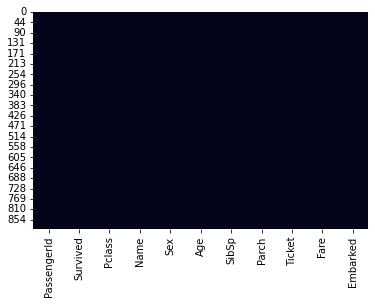

In [269]:
sns.heatmap(train.isnull(),cbar=False)

In [ ]:
# This shows that we don't have any null values we can also check it:

In [270]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [271]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# Model Building Process

Prepare the model before it is given as an input to the Machine Leaning(ML) Algorithm. The ML Algorithms do not understand categorical or any other data, which are not numbers, Hence, I will convert the columns with categorical data(Sex, PClass, Embarked) into numeric using One Hot Encoding.

# ONE HOT ENCODING

One-Hot Encoding simply creates one column for every possible value and put a 1 in the appropriate column. 

I will convert a few columns into categorical data to perform Logistic Regression, as Logistic Regression takes categorical /binary values. get_dummies() function is used to Convert categorical variable into dummy/indicator variables. For more information visit the Pandas documnetation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
pd.get_dummies(train['Sex']).head(5)

In [273]:
sex=pd.get_dummies(train['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [296]:
# we have dropped the first column because only one column is sufficient to determine 
#the gender of the passanger either will ne male (1) or not(0), that means a female

In [275]:
embark=pd.get_dummies(train['Embarked'])

In [276]:
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [277]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [278]:
Pcl=pd.get_dummies(train['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [279]:
titanic=pd.concat([train,sex,embark,Pcl],axis=1)

In [280]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [281]:
#train.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [282]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# Training the Model

In [283]:
X = train.drop(columns='Survived')
y = train['Survived']
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(712, 10)
(712,)


In [284]:
# Spliting training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(477, 10)
(235, 10)
(477,)


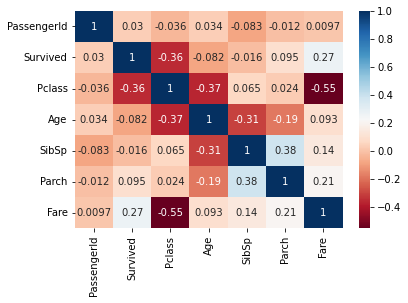

In [285]:
corr =  train.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [286]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [289]:
train['y_pred'] = ypred
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,y_pred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.323052
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.418493
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.369005
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.384354
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.328302


In [290]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [292]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [293]:
## Model building and One Hot Encoding
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [294]:
from sklearn.linear_model import LogisticRegression

In [233]:
# Finding the random state at which model has highest accuracy
scores=[]
for i in range(200):
    X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred), i) 

0.44587157723712034 0
0.3982518397937119 1
0.3222871210135767 2
0.4314834973252969 3
0.46940129982573764 4
0.44977104324237416 5
0.38100766621575455 6
0.35427816586151983 7
0.4150617369194478 8
0.4204933618353933 9
0.42934571263968246 10
0.3897932578905541 11
0.39321427847176404 12
0.45182515823580494 13
0.4115971294999966 14
0.3580607425605107 15
0.4472526623703236 16
0.41683610170159524 17
0.3305134004575707 18
0.43608350511323035 19
0.43309585016260566 20
0.5153127834806794 21
0.4980995768304767 22
0.41329389668021854 23
0.4232818075625099 24
0.4591635961486873 25
0.4749621067901484 26
0.4680796916416432 27
0.3927913125330075 28
0.42058086105538495 29
0.46326194444009394 30
0.396619629291313 31
0.37874138812096403 32
0.370833868195359 33
0.36908174076277145 34
0.4849156322174667 35
0.40491148878176164 36
0.46753139255412424 37
0.5482142957324407 38
0.4021508040538526 39
0.3835314510687683 40
0.4252627645132434 41
0.3946581784328538 42
0.3603448757999874 43
0.34248586609431186 44
0.5

In [234]:
 np.argmax(scores) #find the High velue score

152

In [235]:
scores[np.argmax(scores)] #this is the height r2 score

0.5866007974820553

In [205]:
train.head()

,Survived,Age,SibSp,Parch,Fare,y_pred
0,0,22.0,1,0,7.2500,0.323052
1,1,38.0,1,0,71.2833,0.418493
2,1,26.0,0,0,7.9250,0.369005
3,1,35.0,1,0,53.1000,0.384354
4,0,35.0,0,0,8.0500,0.328302


 Note : You can change the random state to get different result.

In [295]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5866007974820553

In [298]:
#we have the accuracy of 58% which is quite  good and  model can predict the data quite accurately.

# Concluding Remarks

I notice here that accuracy score is close to 60% which makes our model a good model to predict the values accurately , here in Titanic data set our model accurately predicts as to who will survive and who will not survive.

Through Visualization we found out that females have more chances of survival than males, class 1 have more changes of survival, youth age group 20-35 yrs male from class 3 have not survived.

Further, other Machine Learning Algorithms can be applied on the same data set, Ensemble algorithms to boost the performance of the model and get good predictions